<a href="https://colab.research.google.com/github/temple17/matplotlib-practice/blob/main/21_Discrete_distribution_as_horizontal_bar_chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install matplotlib --upgrade

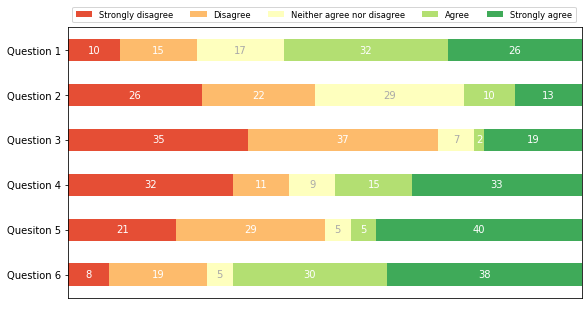

In [2]:
import numpy as np
import matplotlib.pyplot as plt

category_names = ['Strongly disagree', 'Disagree', 'Neither agree nor disagree', 'Agree', 'Strongly agree']

results = {
    'Question 1' : [10, 15, 17, 32, 26],
    'Question 2' : [26, 22, 29, 10, 13],
    'Question 3' : [35, 37, 7, 2, 19],
    'Question 4' : [32, 11, 9, 15, 33],
    'Quesiton 5' : [21, 29, 5, 5, 40],
    'Question 6' : [8, 19, 5, 30, 38]
}

def survey(results, category_names):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1])
    )

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor = (0, 1),
              loc='lower left', fontsize='small')
    return fig, ax

survey(results, category_names)
plt.show()